In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LassoCV
# !pip install tabulate
from tabulate import tabulate

In [14]:
df = pd.read_csv('train.csv')
df = df.drop(columns = ['Id'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

#### Description of Variables in Dataset

-	MSSubClass: Identifies the type of dwelling involved in the sale.
-	LotFrontage: Linear feet of street connected to property
-	LotArea: Lot size in square feet
-	Street: Type of road access to property
-	Alley: Type of alley access to property
-	LotShape: General shape of property
-	LandContour: Flatness of the property
-	Utilities: Type of utilities available
-	LotConfig: Lot configuration
-	LandSlope: Slope of property
-	Neighborhood: Physical locations within Ames city limits
-	Condition1: Proximity to various conditions
-	Condition2: Proximity to various conditions (if more than one is present)
-	BldgType: Type of dwelling
-	HouseStyle: Style of dwelling
-	OverallQual: Rates the overall material and finish of the house
-	OverallCond: Rates the overall condition of the house
-	YearBuilt: Original construction date
-	YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
-	RoofStyle: Type of roof
-	RoofMatl: Roof material
-	Exterior1st: Exterior covering on house
-	Exterior2nd: Exterior covering on house (if more than one material)
-	MasVnrType: Masonry veneer type
-	MasVnrArea: Masonry veneer area in square feet
-	ExterQual: Evaluates the quality of the material on the exterior 
-	ExterCond: Evaluates the present condition of the material on the exterior
-	Foundation: Type of foundation
-	BsmtQual: Evaluates the height of the basement
-	BsmtCond: Evaluates the general condition of the basement
-	BsmtExposure: Refers to walkout or garden level walls
-	BsmtFinType1: Rating of basement finished area
-	BsmtFinSF1: Type 1 finished square feet
-	BsmtFinType2: Rating of basement finished area (if multiple types)
-	BsmtFinSF2: Type 2 finished square feet
-	BsmtUnfSF: Unfinished square feet of basement area
-	TotalBsmtSF: Total square feet of basement area
-	Heating: Type of heating
-	HeatingQC: Heating quality and condition
-	CentralAir: Central air conditioning
-	Electrical: Electrical system type
-	1stFlrSF: First Floor square feet
-	2ndFlrSF: Second floor square feet
-	LowQualFinSF: Low quality finished square feet (all floors)
-	GrLivArea: Above grade (ground) living area square feet
-	BsmtFullBath: Basement full bathrooms
-	BsmtHalfBath: Basement half bathrooms
-	FullBath: Full bathrooms above grade
-	HalfBath: Half baths above grade
-	Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
-	Kitchen: Kitchens above grade
-	KitchenQual: Kitchen quality
-	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
-	Functional: Home functionality (Assume typical unless deductions are warranted)
-	Fireplaces: Number of fireplaces
-	FireplaceQu: Fireplace quality
-	GarageType: Garage location
-	GarageYrBlt: Year garage was built
-	GarageFinish: Interior finish of the garage
-	GarageCars: Size of garage in car capacity
-	GarageArea: Size of garage in square feet
-	GarageQual: Garage quality
-	PavedDrive: Paved driveway
-	WoodDeckSF: Wood deck area in square feet
-	OpenPorchSF: Open porch area in square feet
-	EnclosedPorch: Enclosed porch area in square feet
-	3SsnPorch: Three season porch area in square feet
-	ScreenPorch: Screen porch area in square feet
-	PoolArea: Pool area in square feet
-	PoolQC: Pool quality
-	Fence: Fence quality
-	MiscFeature: Miscellaneous feature not covered in other categories
-	MiscVal: Value of miscellaneous feature (in dollars)
-	MoSold: Month Sold (MM)
-	YrSold: Year Sold (YYYY)
-	SaleType: Type of sale
-	SaleCondition: Condition of sale



In [15]:
desc = pd.read_csv("Data_Dictionary.csv")
desc

,Column Name,Description
0,MSSubClass,Identifies the type of dwelling involved in t...
1,LotFrontage,Linear feet of street connected to property
2,LotArea,Lot size in square feet
3,Street,Type of road access to property
4,Alley,Type of alley access to property
...,...,...
72,MiscVal,Value of miscellaneous feature (in dollars)
73,MoSold,Month Sold (MM)
74,YrSold,Year Sold (YYYY)
75,SaleType,Type of sale


In [16]:
# Checking dataframe column info to verify the data type assigned is correct or not, as well as to find missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

According to the data description, it's clear that the object columns 'GarageYrBlt', 'LotFrontage', 'MasVnrArea' are supposed to be numeric. But these columns have some missing values as well. Thus first imputing the missing values with appropriate numerical parameters and then converting the columns to appropriate data type.

In [17]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

df['GarageYrBlt'] = df['GarageYrBlt'].astype('int64')

In [18]:
# checking all categorical columns
list(df.select_dtypes(include=['object']).columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:
# checking all discrete numerical columns
list(df.select_dtypes(include=['int64']).columns)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Checking list and Data Description it's clear that columns 'LotArea', 'BsmtFinSF', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice' are supposed to be continous variable. Hence changing their data type to float64

In [20]:
to_chn = ['LotArea', 'LowQualFinSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
for i in range(len(to_chn)):
    df[to_chn[i]] =   df[to_chn[i]].astype('float64')
list(df.select_dtypes(include=['int64']).columns)

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'MoSold',
 'YrSold']

In [21]:
# checking all continuous numerical columns
list(df.select_dtypes(include=['float64']).columns)

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Now none of the numerical columns have missing values, and all columns are assigned correct data type. But categorical columns still have many missing values. Thus analyzing them.

In [23]:
# Checking again for missing values, and converting the result to a data frame
pd.DataFrame(df.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)).rename(columns= {0: 'No. of missing values'})

,No. of missing values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81
BsmtFinType2,38


From the data description and info(), it's clear that in categorical columns, 'NA' is used in the data frame, not as missing values, but literally to indicate absence of the specified feature at the house. Hence we need to replace 'NA' with something meaningful so that it wouldn't be considered as missing value. Thus replcing 'NA' with 'Not Present'.

In [24]:
df = df.fillna('Not Present')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Not Present,Attchd,2003,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,Not Present,Not Present,Not Present,0.0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Not Present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,Not Present,Not Present,Not Present,0.0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,Not Present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,Not Present,Not Present,Not Present,0.0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,Not Present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,Not Present,Not Present,Not Present,0.0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,Not Present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,Not Present,Not Present,Not Present,0.0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,Not Present,Not Present,Not Present,0.0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175.0,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500.0,TA,TA,Y,349.0,0.0,0.0,0.0,0.0,0.0,Not Present,MnPrv,Not Present,0.0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042.0,Pave,Not Present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,

In [25]:
#Checking for missing values again
df.isnull().sum().loc[lambda x : x>0]

Series([], dtype: int64)

So there are no more missing values in the dataframe. Moving on to checking for duplicate entries.

In [26]:
#checking duplicates
df.duplicated().sum()

0

No duplicates are there in the data. And since, we have all columns with non-null, non duplicate data, the data frame is ready to be used for Exploratory Data Analysis.

## Univariate Analysis

In [27]:
cat = list(df.select_dtypes(include=['object', 'int64']).columns)
num = list(df.select_dtypes(include=['float64']).columns)
def cns_plt(feature):
    for i in range(len(feature)):
        ct = feature[i] 
        sns.countplot(ct, data = df)
        plt.show()

def box_plt(feature):
     for i in range(len(feature)):
        nm = feature[i] 
        sns.boxplot(nm, data = df)
        plt.show()

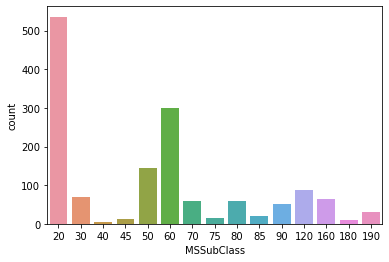

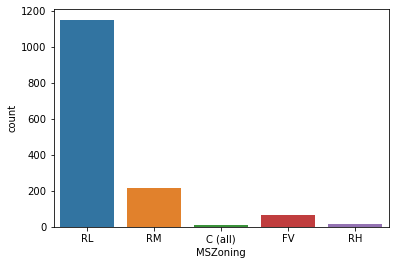

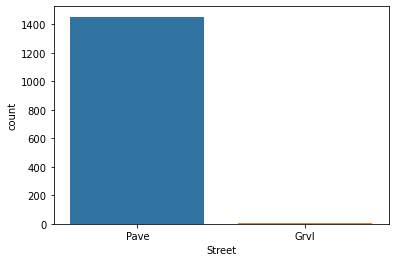

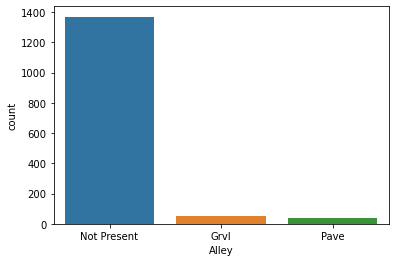

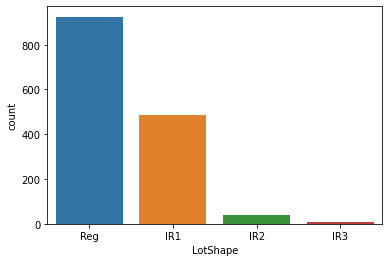

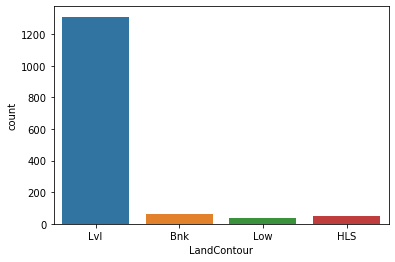

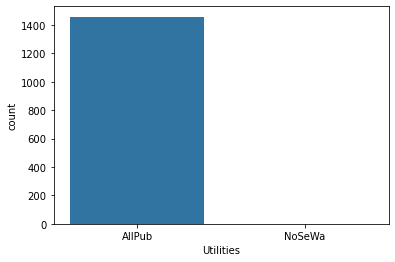

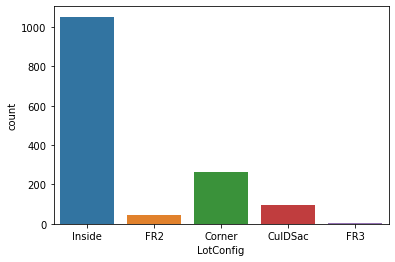

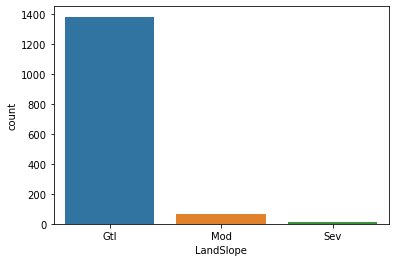

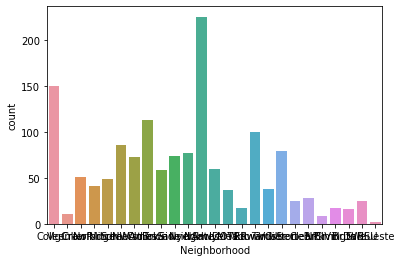

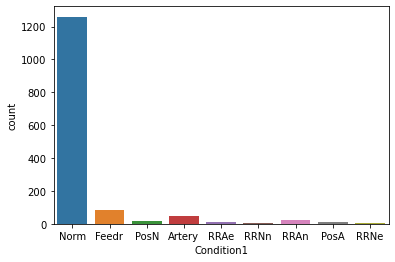

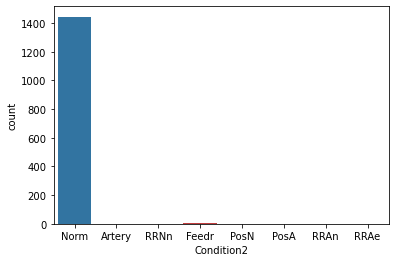

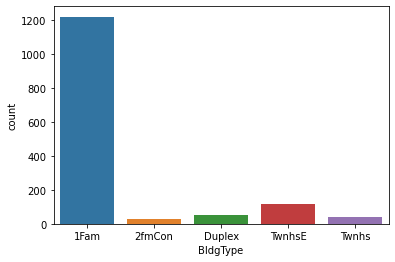

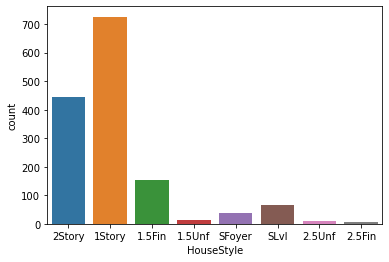

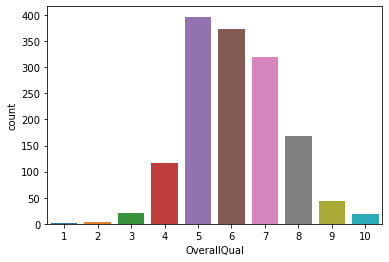

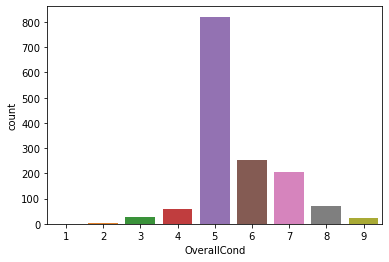

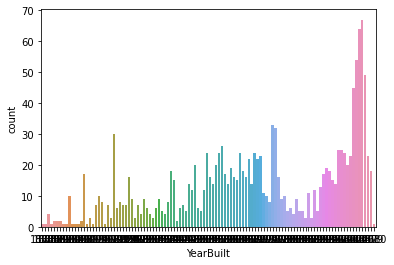

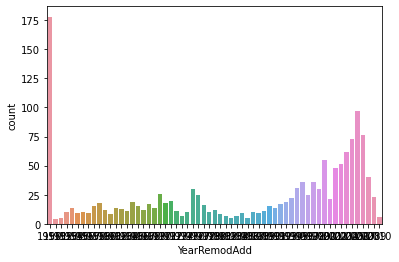

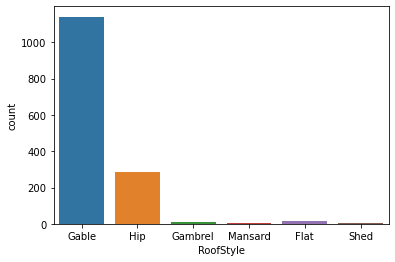

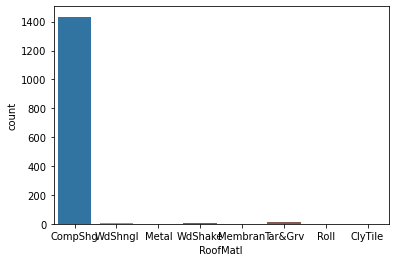

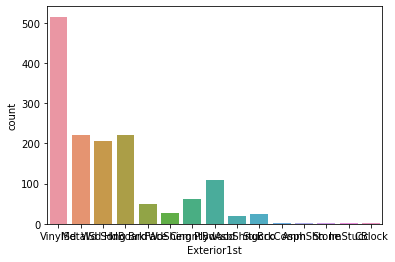

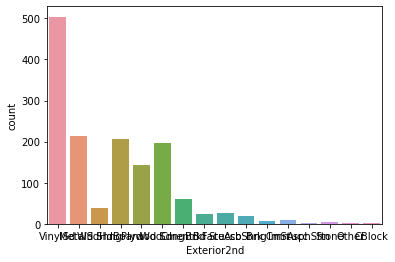

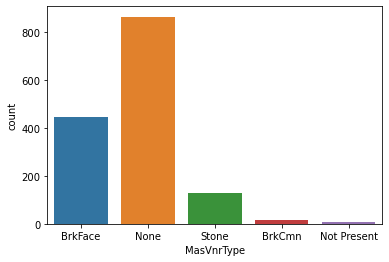

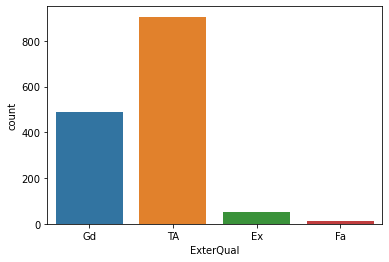

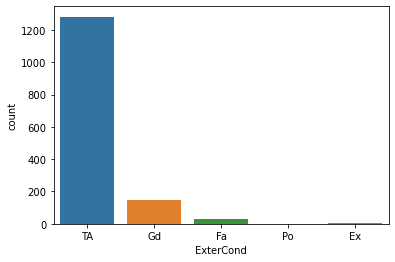

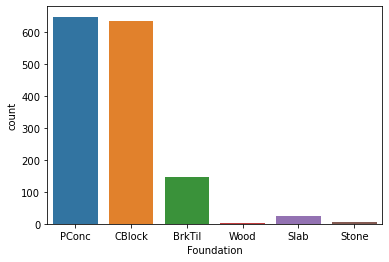

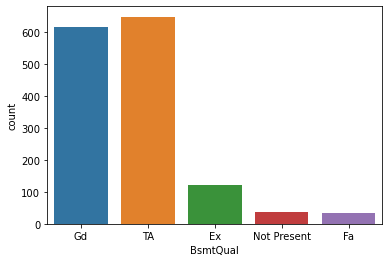

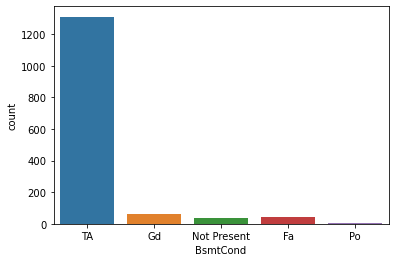

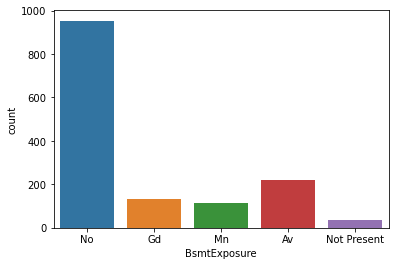

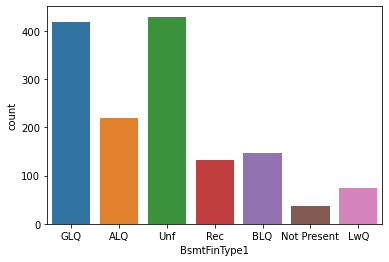

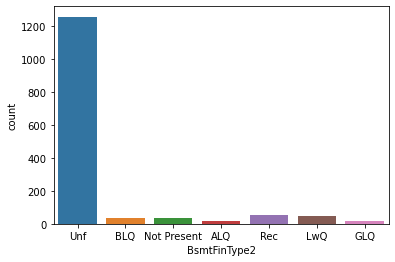

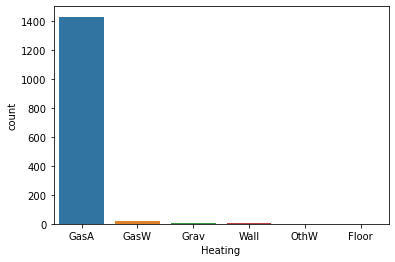

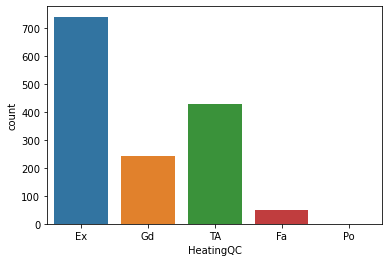

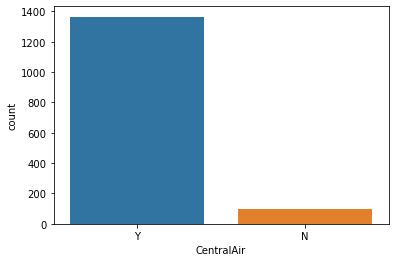

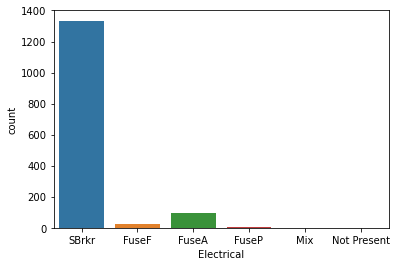

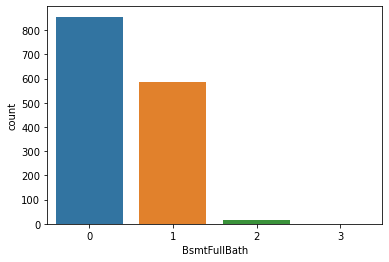

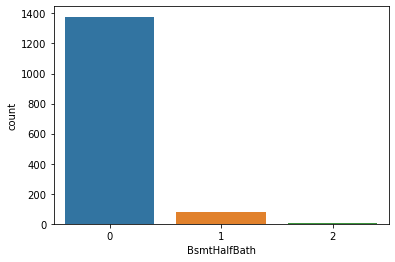

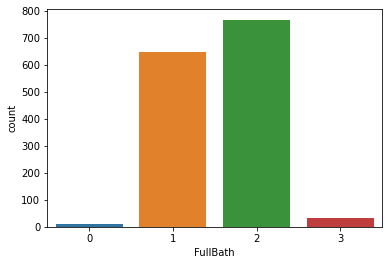

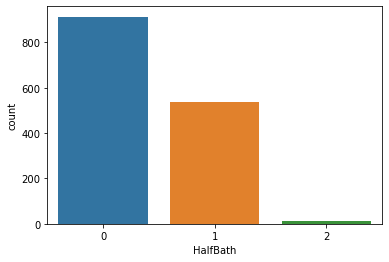

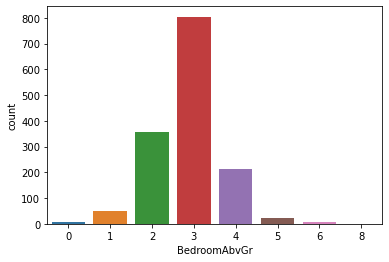

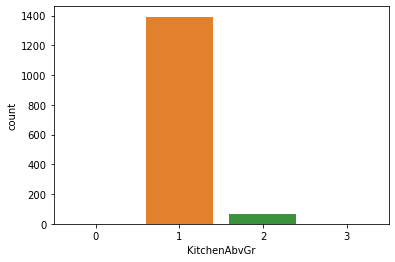

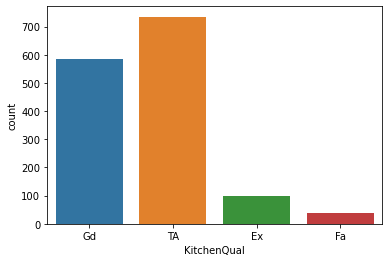

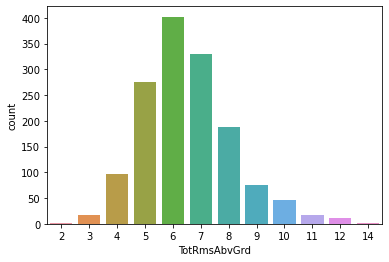

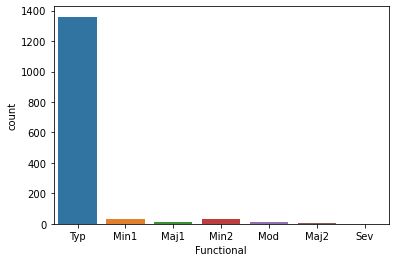

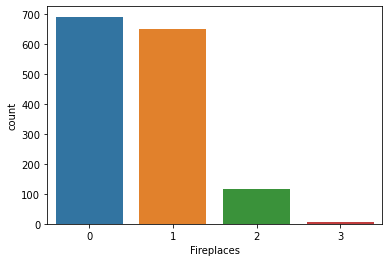

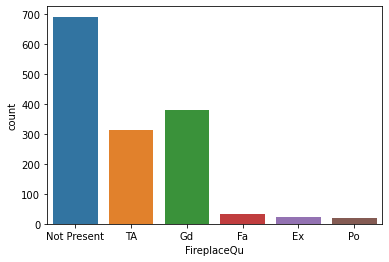

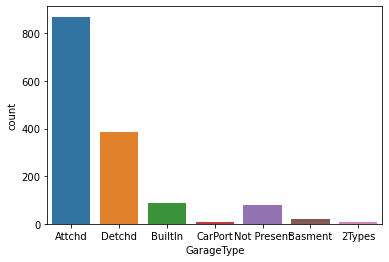

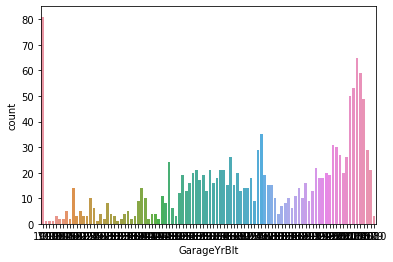

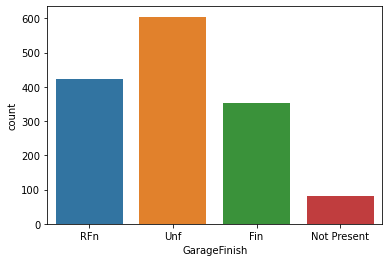

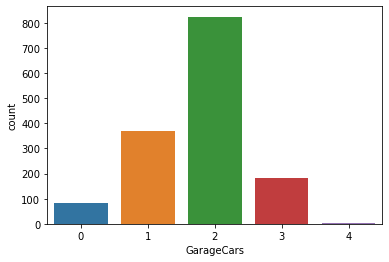

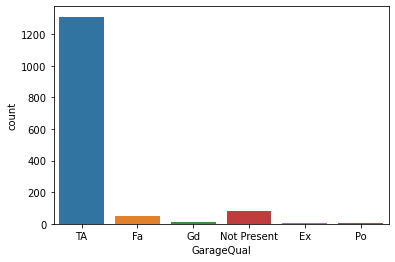

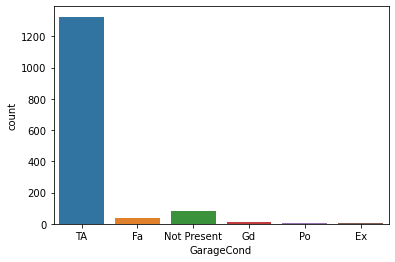

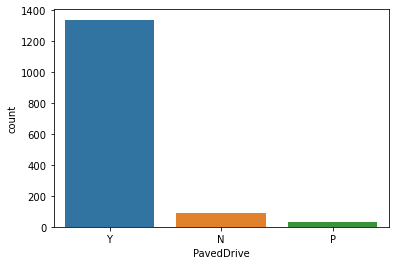

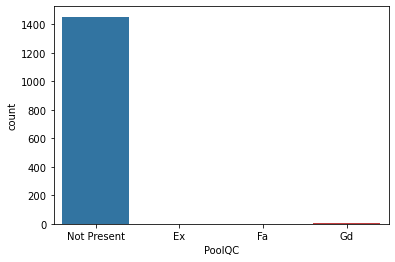

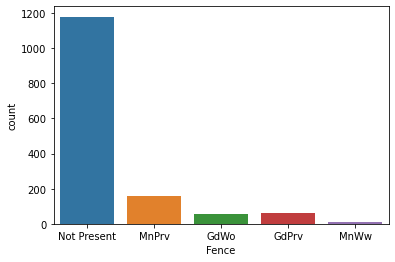

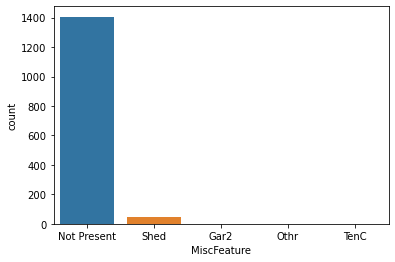

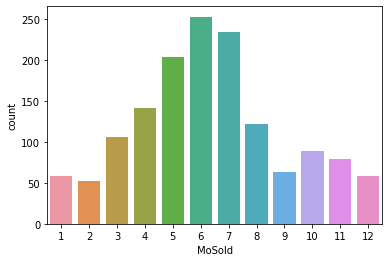

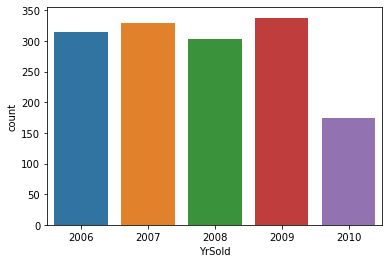

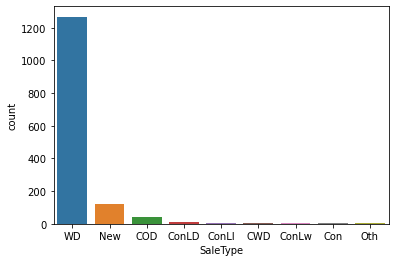

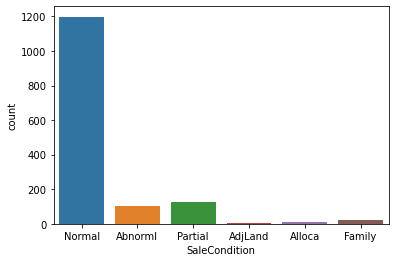

In [28]:
# Visualizing categorical and discrete numeric variables using count plots to get an idea about frequecy distribution
cns_plt(cat)

Some of the categorical columns seem to have majority of values same, making the column redundant. Using value_counts() to verify the assumption on each column which has more that 85% (1241) values repreating out of total (1460).

In [29]:
cat_col = []
cat_columns = df.select_dtypes(include=['object', 'int64'])
for col in cat_columns:
    if(df[col].value_counts().max() >= (0.85*1460)):
        cat_col.append(col)
cat_col

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

Since the above columns have more than 85% of data points assigned to  a single value, they are higly skewed, and it would be better to drop them rather than to include in further data analysis

In [30]:
df.drop(cat_col, axis = 1, inplace = True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,0.0,150.0,856.0,Ex,856.0,854.0,0.0,1710.0,1,2,1,3,Gd,8,0,Not Present,Attchd,2003,RFn,2,548.0,0.0,61.0,0.0,0.0,0.0,0.0,Not Present,0.0,2,2008,Normal,208500.0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,0.0,284.0,1262.0,Ex,1262.0,0.0,0.0,1262.0,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460.0,298.0,0.0,0.0,0.0,0.0,0.0,Not Present,0.0,5,2007,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,0.0,434.0,920.0,Ex,920.0,866.0,0.0,1786.0,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608.0,0.0,42.0,0.0,0.0,0.0,0.0,Not Present,0.0,9,2008,Normal,223500.0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,0.0,540.0,756.0,Gd,961.0,756.0,0.0,1717.0,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642.0,0.0,35.0,272.0,0.0,0.0,0.0,Not Present,0.0,2,2006,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,0.0,490.0,1145.0,Ex,1145.0,1053.0,0.0,2198.0,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836.0,192.0,84.0,0.0,0.0,0.0,0.0,Not Present,0.0,12,2008,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Reg,Inside,Gilbert,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0.0,0.0,953.0,953.0,Ex,953.0,694.0,0.0,1647.0,0,2,1,3,TA,7,1,TA,Attchd,1999,RFn,2,460.0,0.0,40.0,0.0,0.0,0.0,0.0,Not Present,0.0,8,2007,Normal,175000.0
1456,20,RL,85.0,13175.0,Reg,Inside,NWAmes,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790.0,163.0,589.0,1542.0,TA,2073.0,0.0,0.0,2073.0,1,2,0,3,TA,7,2,TA,Attchd,1978,Unf,2,500.0,349.0,0.0,0.0,0.0,0.0,0.0,MnPrv,0.0,2,2010,Normal,210000.0
1457,70,RL,66.0,9042.0,Reg,Inside,Crawfor,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275.0,0.0,877.0,1152.0,Ex,1188.0,1152.0,0.0,2340.0,0,2,0,4,Gd,9,2,Gd,Attchd,1941,RFn,1,252.0,0.0,60.0,0.0,0.0,0.0,0.0,GdPrv,2500.0,5,2010,Normal,266500.0
1458,20,RL,68.0,9717.0,Reg,Inside,NAmes,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49.0,1029.0,0.0,1078.0,Gd,1078.0,0.0,0.0,1078.0,1,1,0,2,Gd,5,0,Not Present,Attchd,1950,Unf,1,240.0,366.0,0.0,112.0,0.0,0.0,0.0,Not Present,0.0,4,2010,Normal,142125.0


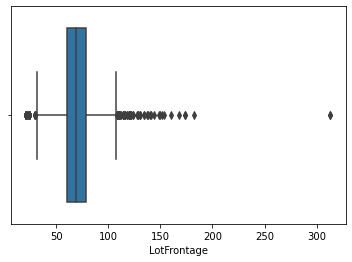

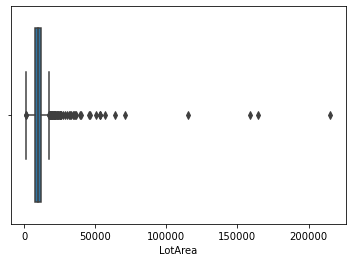

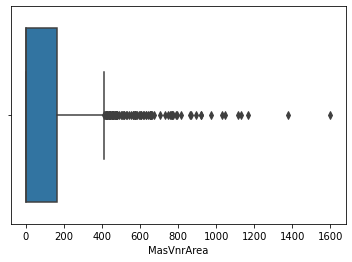

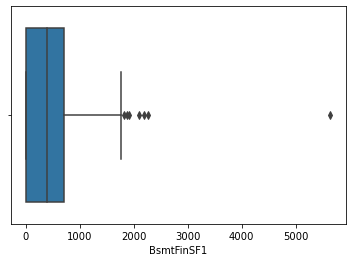

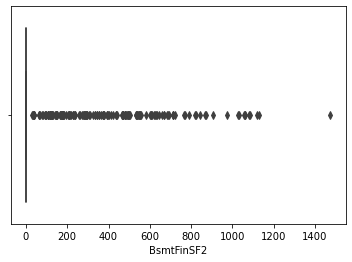

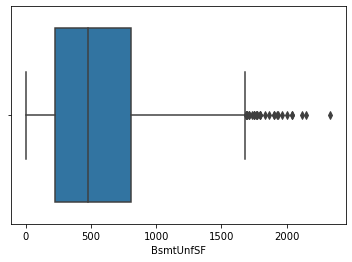

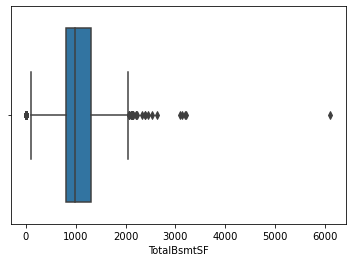

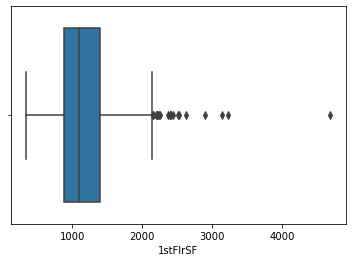

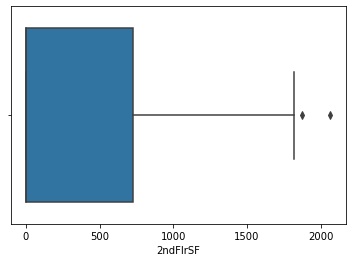

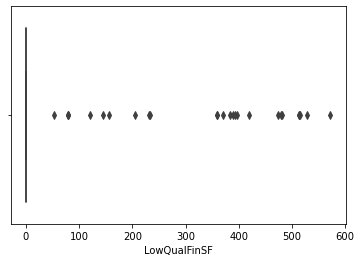

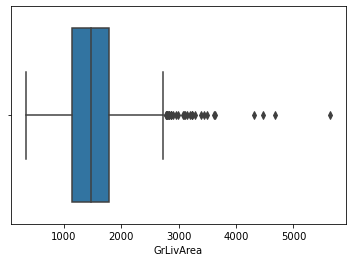

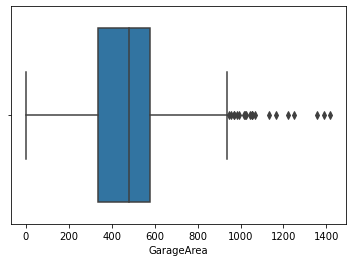

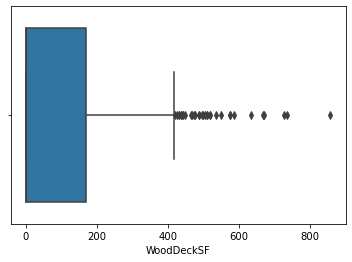

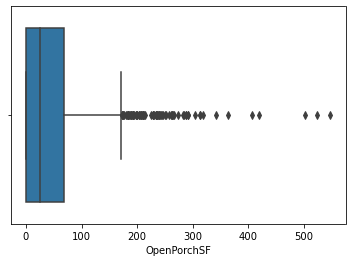

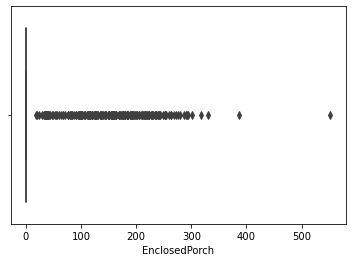

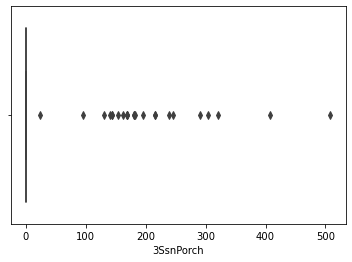

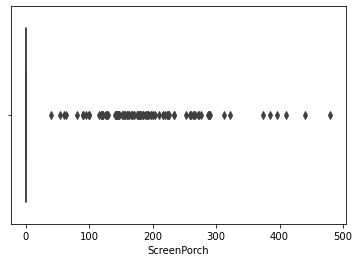

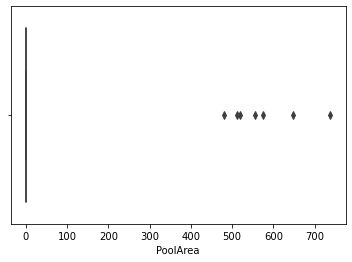

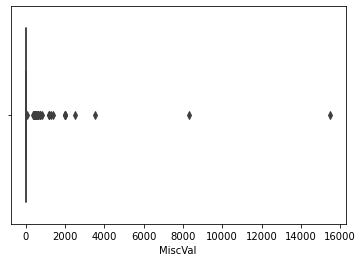

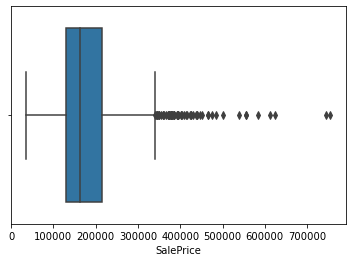

In [31]:
#  Visualizing continuous numerical variables using box plots
box_plt(num)

In [32]:
num_col = []
numerical_columns = df.select_dtypes(include=['float64'])
for col in numerical_columns:
    if(df[col].value_counts().max() >= (0.85*1460)):
        num_col.append(col)
num_col

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [33]:
def val_cnt(feature, df):
    for i in range(len(feature)):
        nm = feature[i]
        print(df[nm].value_counts())
val_cnt(num_col, df)

0.0      1293
180.0       5
374.0       3
290.0       2
117.0       2
         ... 
500.0       1
396.0       1
600.0       1
492.0       1
491.0       1
Name: BsmtFinSF2, Length: 144, dtype: int64
0.0      1434
80.0        3
360.0       2
572.0       1
528.0       1
144.0       1
392.0       1
156.0       1
53.0        1
232.0       1
120.0       1
384.0       1
479.0       1
205.0       1
481.0       1
371.0       1
514.0       1
513.0       1
234.0       1
390.0       1
420.0       1
397.0       1
515.0       1
473.0       1
Name: LowQualFinSF, dtype: int64
0.0      1252
112.0      15
96.0        6
216.0       5
120.0       5
         ... 
189.0       1
552.0       1
268.0       1
221.0       1
280.0       1
Name: EnclosedPorch, Length: 120, dtype: int64
0.0      1436
168.0       3
144.0       2
180.0       2
216.0       2
153.0       1
130.0       1
245.0       1
304.0       1
96.0        1
290.0       1
162.0       1
23.0        1
508.0       1
196.0       1
140.0       1
238.0   

From the box plot, describe() and val_cnt() outputs it is clear that all columns listed in num_col have most of the values equal to '0'. Hence dropping these columns.

In [34]:
df.drop(num_col, axis =1, inplace = True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,Ex,856.0,854.0,1710.0,1,2,1,3,Gd,8,0,Not Present,Attchd,2003,RFn,2,548.0,0.0,61.0,Not Present,2,2008,Normal,208500.0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,Ex,1262.0,0.0,1262.0,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460.0,298.0,0.0,Not Present,5,2007,Normal,181500.0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,Ex,920.0,866.0,1786.0,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608.0,0.0,42.0,Not Present,9,2008,Normal,223500.0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,Gd,961.0,756.0,1717.0,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642.0,0.0,35.0,Not Present,2,2006,Abnorml,140000.0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,Ex,1145.0,1053.0,2198.0,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836.0,192.0,84.0,Not Present,12,2008,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Reg,Inside,Gilbert,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0.0,953.0,953.0,Ex,953.0,694.0,1647.0,0,2,1,3,TA,7,1,TA,Attchd,1999,RFn,2,460.0,0.0,40.0,Not Present,8,2007,Normal,175000.0
1456,20,RL,85.0,13175.0,Reg,Inside,NWAmes,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790.0,589.0,1542.0,TA,2073.0,0.0,2073.0,1,2,0,3,TA,7,2,TA,Attchd,1978,Unf,2,500.0,349.0,0.0,MnPrv,2,2010,Normal,210000.0
1457,70,RL,66.0,9042.0,Reg,Inside,Crawfor,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275.0,877.0,1152.0,Ex,1188.0,1152.0,2340.0,0,2,0,4,Gd,9,2,Gd,Attchd,1941,RFn,1,252.0,0.0,60.0,GdPrv,5,2010,Normal,266500.0
1458,20,RL,68.0,9717.0,Reg,Inside,NAmes,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49.0,0.0,1078.0,Gd,1078.0,0.0,1078.0,1,1,0,2,Gd,5,0,Not Present,Attchd,1950,Unf,1,240.0,366.0,0.0,Not Present,4,2010,Normal,142125.0


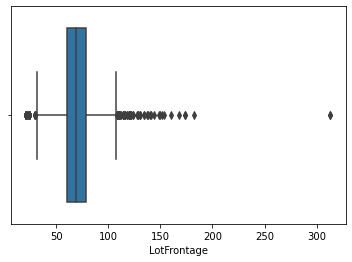

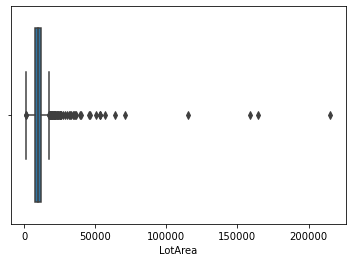

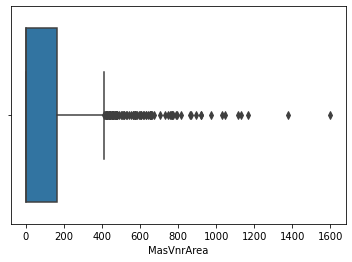

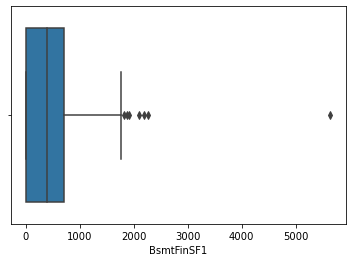

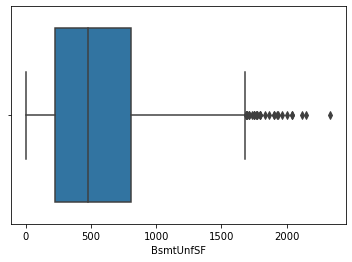

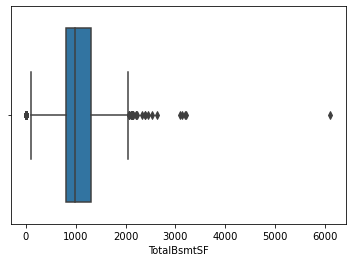

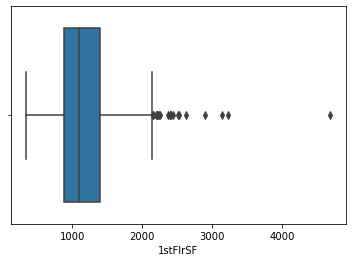

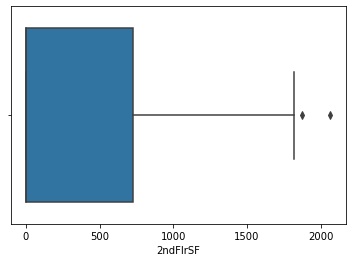

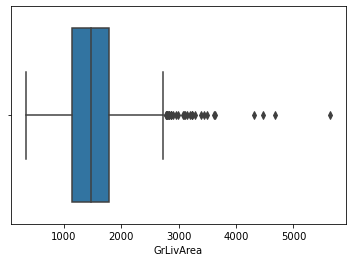

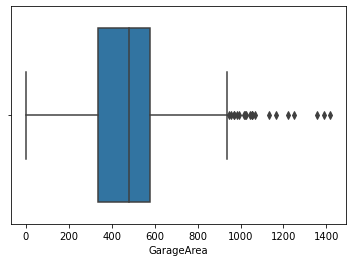

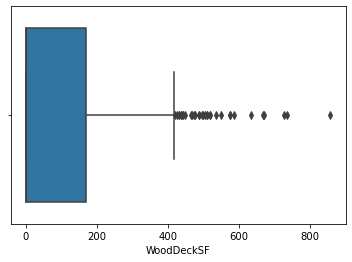

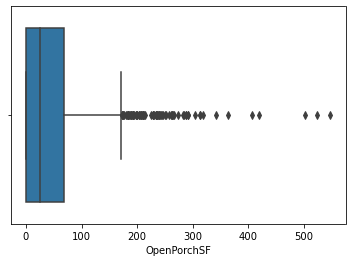

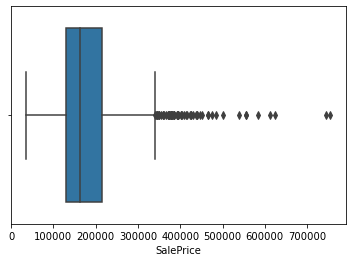

In [35]:
num = list(df.select_dtypes(include=['float64']).columns)
box_plt(num)

In [36]:
# checking the skewness of numerical variables
skewed = pd.DataFrame(df.select_dtypes(include=['float64']).skew()).sort_values(by = 0 ,ascending = False).rename(columns={0: 'Skewness'})
skewed

,Skewness
LotArea,12.207688
MasVnrArea,2.677616
LotFrontage,2.409147
OpenPorchSF,2.364342
SalePrice,1.882876
BsmtFinSF1,1.685503
WoodDeckSF,1.541376
TotalBsmtSF,1.524255
1stFlrSF,1.376757
GrLivArea,1.366560


Majority of the numerical attributes are highly skewed and have many outliers. But dropping all the values will lead to significant loss of train data. Hence, identifying and treating outliers using 0.99 quantile.

LotArea


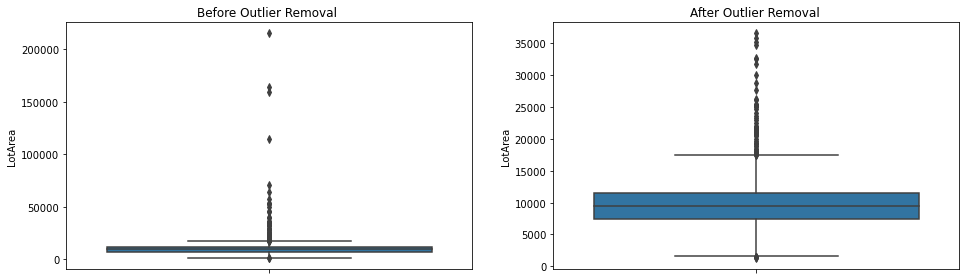

MasVnrArea


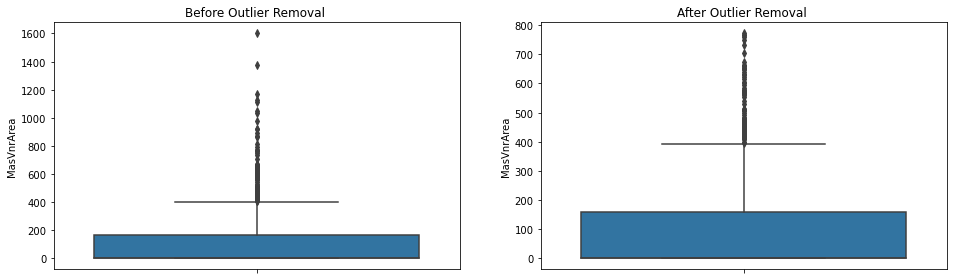

LotFrontage


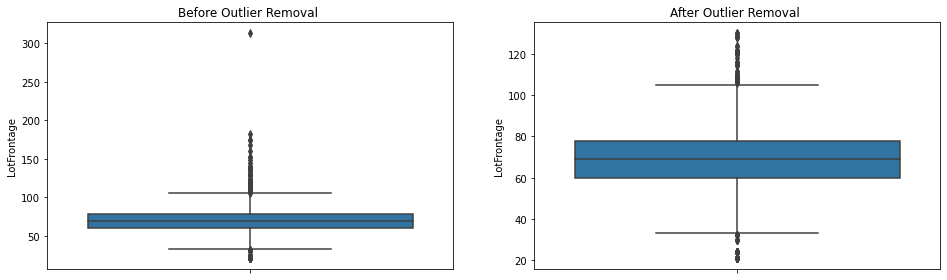

OpenPorchSF


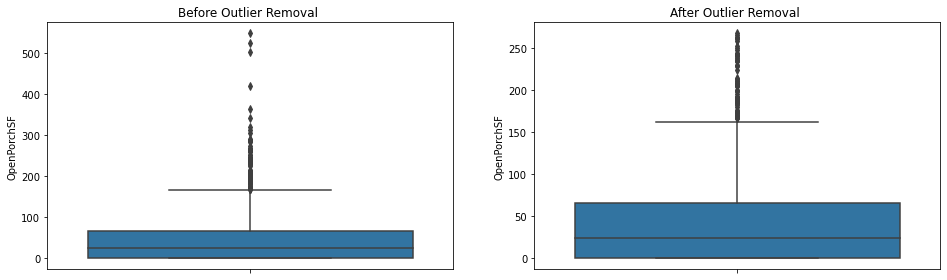

SalePrice


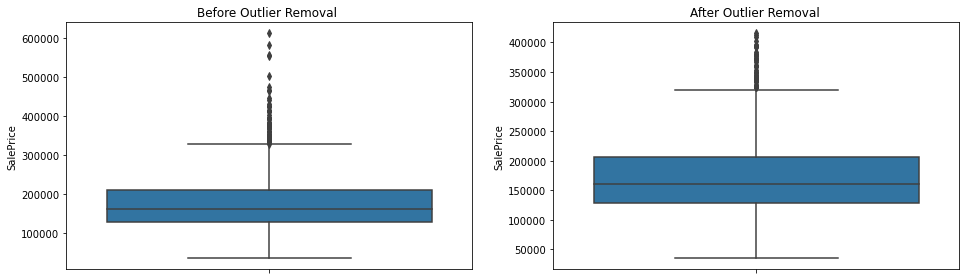

BsmtFinSF1


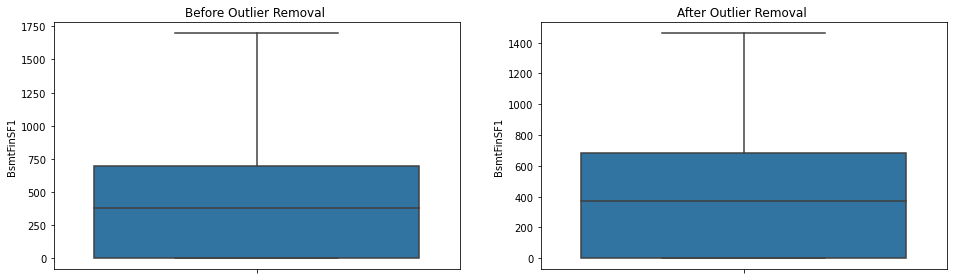

WoodDeckSF


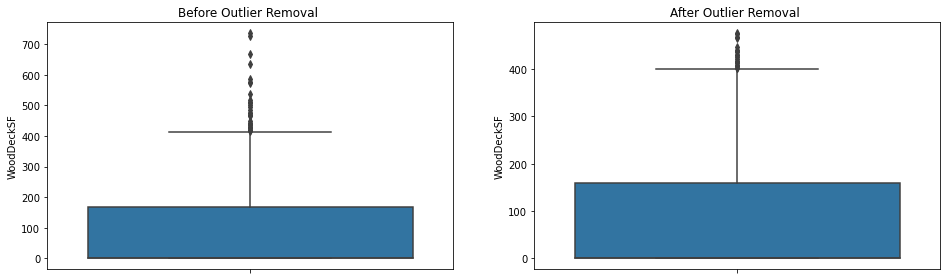

TotalBsmtSF


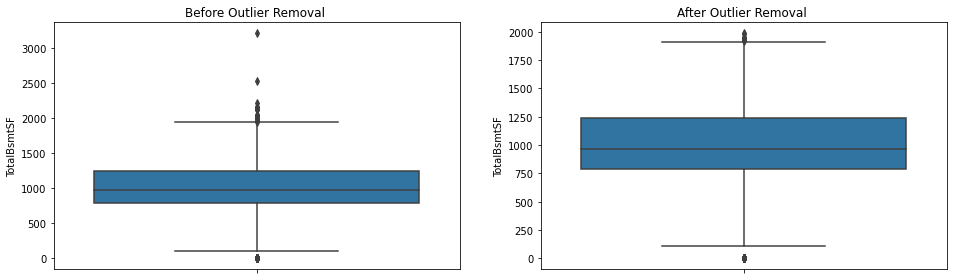

1stFlrSF


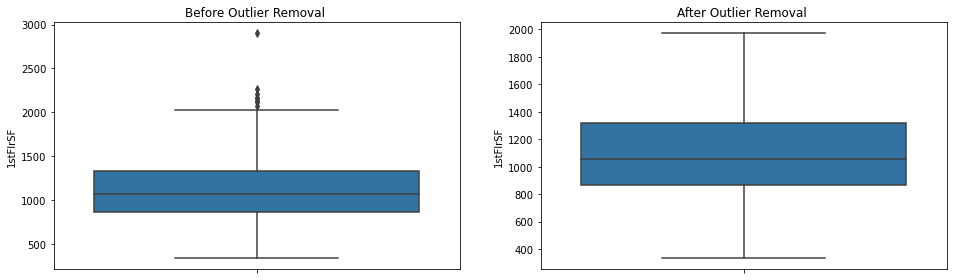

GrLivArea


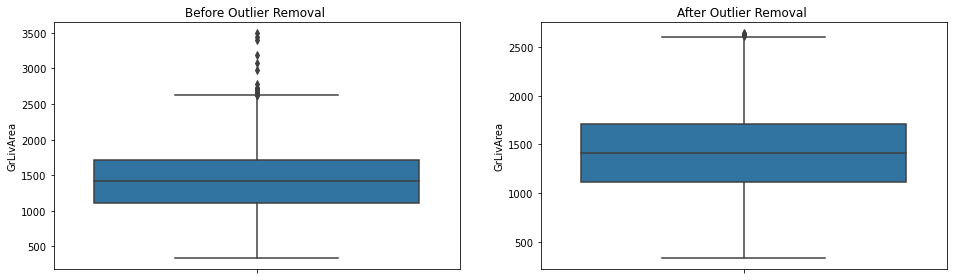

BsmtUnfSF


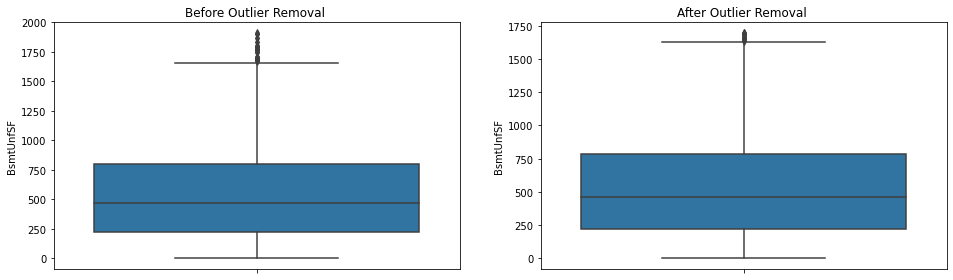

2ndFlrSF


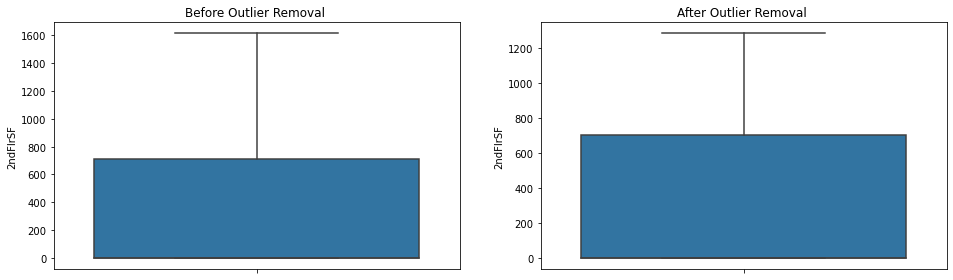

GarageArea


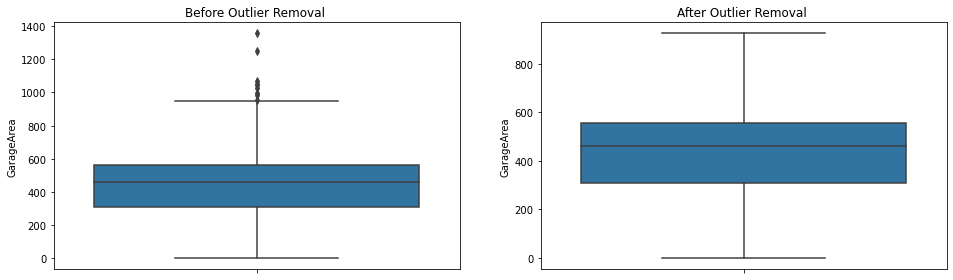

In [37]:
# Outlier Identification and Removal in highly skewed columns
s =list(skewed.index)
def out(feature, df):
    for i in range(len(feature)):
        nm = feature[i] 
        print(nm)
        quantile = df[nm].quantile(0.99)
        plt.figure(figsize = (16,10))
        plt.subplot(2,2,1)
        plt.title("Before Outlier Removal ")
        sns.boxplot(y= nm, data = df)
        df = df[df[nm] < quantile]
        plt.subplot(2,2,2)
        plt.title("After Outlier Removal ")
        sns.boxplot(y= nm, data = df)
        plt.show()
out(s,df)

In [38]:
s =list(skewed.index)
skew = []
for i in range(len(s)):
    nm = s[i] 
    quantile = df[nm].quantile(0.99)
    skew.append([nm, quantile])
for i in range(len(skew)):
    df = df[df[skew[i][0]] < skew[i][1]]

In [39]:
# Checking how much data retained after outlier treatment
retain = round(100*(len(df)/1460),2)
print(retain)

91.85


In [40]:
df.shape

(1341, 50)

Most of the data is retained even after outler treatment. Hence we are good to move forward. Now all outliers that may impact analysis are removed from the numerical continous attributes. Moving on to check on current attributes, and replacing some with more meaningful data driven metrics.

In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
cc = pd.DataFrame(df.columns)
cc.rename(columns = {0:'Column Name'}, inplace = True)
desc = pd.merge(desc, cc, how = 'inner', on = 'Column Name')
desc

,Column Name,Description
0,MSSubClass,Identifies the type of dwelling involved in the sale.
1,LotFrontage,Linear feet of street connected to property
2,LotArea,Lot size in square feet
3,LotShape,General shape of property
4,LotConfig,Lot configuration
5,Neighborhood,Physical locations within Ames city limits
6,BldgType,Type of dwelling
7,HouseStyle,Style of dwelling
8,OverallQual,Rates the overall material and finish of the house
9,OverallCond,Rates the overall condition of the house


We have columns YearBuilt and YearRemodAdd as two different attributes, we can combine these two to determine the age of the property at the time of sale.

In [42]:
#Creating more meaningful Derived Variables
def PropAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
df['PropertyAge'] = df.apply(PropAge, axis=1)
df.drop(columns = ['YearBuilt', 'YearRemodAdd'], inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,Ex,856.0,854.0,1710.0,1,2,1,3,Gd,8,0,Not Present,Attchd,2003,RFn,2,548.0,0.0,61.0,Not Present,2,2008,Normal,208500.0,5
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,Ex,1262.0,0.0,1262.0,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460.0,298.0,0.0,Not Present,5,2007,Normal,181500.0,31
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,Ex,920.0,866.0,1786.0,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608.0,0.0,42.0,Not Present,9,2008,Normal,223500.0,6
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,Gd,961.0,756.0,1717.0,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642.0,0.0,35.0,Not Present,2,2006,Abnorml,140000.0,36
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,Ex,1145.0,1053.0,2198.0,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836.0,192.0,84.0,Not Present,12,2008,Normal,250000.0,8


Now we have all attributes need, before moving forward with data transformation and model building, multicollinearity between corrent attributes need to be checked, and those which are highly correlated need to be removed.

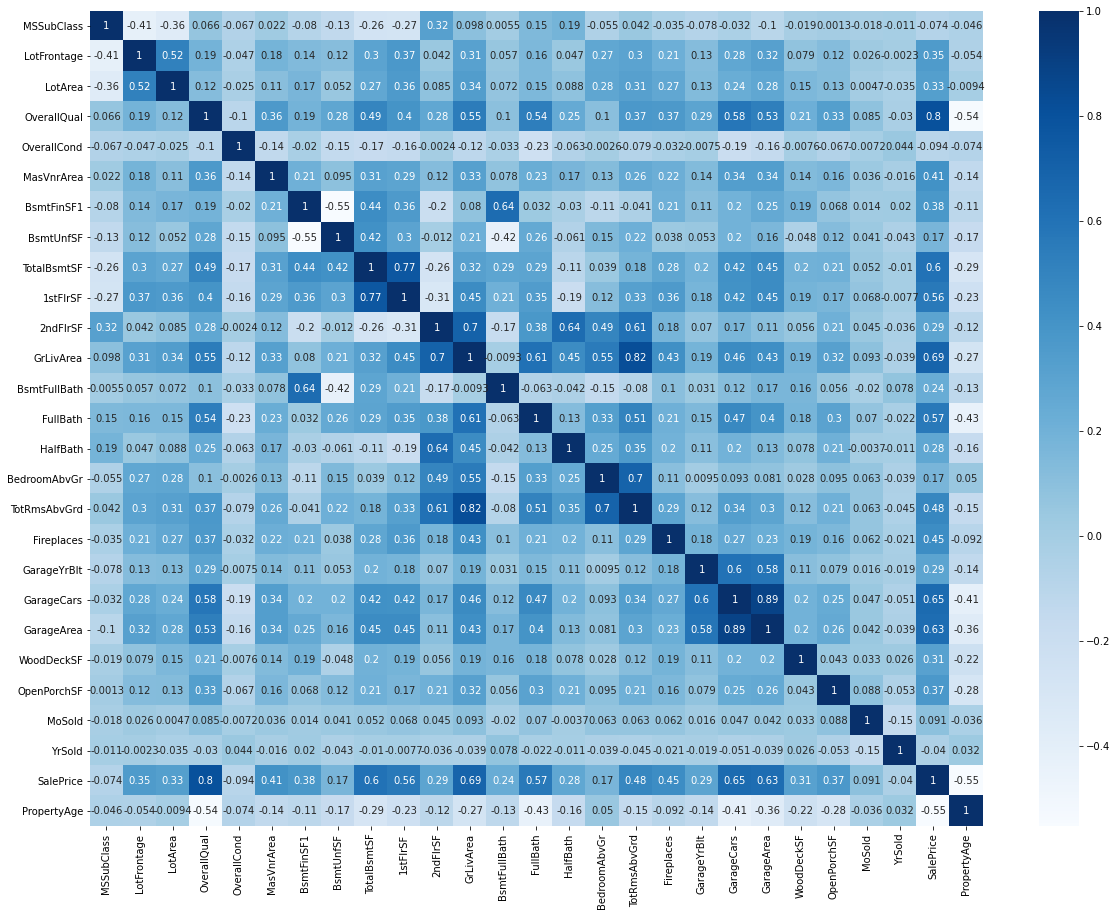

In [43]:
# Checking the correlation of numerical attributes
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [44]:
corr = df.corr()
corr = corr.unstack()
c = corr.sort_values(kind="quicksort")
c

BsmtUnfSF     BsmtFinSF1     -0.552522
BsmtFinSF1    BsmtUnfSF      -0.552522
SalePrice     PropertyAge    -0.549648
PropertyAge   SalePrice      -0.549648
OverallQual   PropertyAge    -0.539634
PropertyAge   OverallQual    -0.539634
              FullBath       -0.433185
FullBath      PropertyAge    -0.433185
BsmtFullBath  BsmtUnfSF      -0.421910
BsmtUnfSF     BsmtFullBath   -0.421910
LotFrontage   MSSubClass     -0.414093
MSSubClass    LotFrontage    -0.414093
PropertyAge   GarageCars     -0.407690
GarageCars    PropertyAge    -0.407690
LotArea       MSSubClass     -0.361655
MSSubClass    LotArea        -0.361655
GarageArea    PropertyAge    -0.359093
PropertyAge   GarageArea     -0.359093
2ndFlrSF      1stFlrSF       -0.309613
1stFlrSF      2ndFlrSF       -0.309613
TotalBsmtSF   PropertyAge    -0.289296
PropertyAge   TotalBsmtSF    -0.289296
OpenPorchSF   PropertyAge    -0.280648
PropertyAge   OpenPorchSF    -0.280648
GrLivArea     PropertyAge    -0.270413
PropertyAge   GrLivArea  

We can see that following attributes are stongly positively correlated. 
- GarageCars and Garage Area,
- TotRmsAbvGrd and GrLivArea 

Hence removing 'GarageCars' and 'TotRmsAbvGrd'.

In [45]:
df.drop(columns=['GarageCars','TotRmsAbvGrd'], inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,Ex,856.0,854.0,1710.0,1,2,1,3,Gd,0,Not Present,Attchd,2003,RFn,548.0,0.0,61.0,Not Present,2,2008,Normal,208500.0,5
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,Ex,1262.0,0.0,1262.0,0,2,0,3,TA,1,TA,Attchd,1976,RFn,460.0,298.0,0.0,Not Present,5,2007,Normal,181500.0,31
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,Ex,920.0,866.0,1786.0,1,2,1,3,Gd,1,TA,Attchd,2001,RFn,608.0,0.0,42.0,Not Present,9,2008,Normal,223500.0,6
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,Gd,961.0,756.0,1717.0,1,1,0,3,Gd,1,Gd,Detchd,1998,Unf,642.0,0.0,35.0,Not Present,2,2006,Abnorml,140000.0,36
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,Ex,1145.0,1053.0,2198.0,1,2,1,4,Gd,1,TA,Attchd,2000,RFn,836.0,192.0,84.0,Not Present,12,2008,Normal,250000.0,8


Now before splitting the data into train and test sets, the text values in categorical columns need to be replaced with dummy variables

In [46]:
# Converting categorical values into Dummy variables
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not Present,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not Present,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not Present,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Present,GarageFinish_Not Present,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,1,2,1,3,0,2003,548.0,0.0,61.0,2,2008,208500.0,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,6,8,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,0,2,0,3,1,1976,460.0,298.0,0.0,5,2007,181500.0,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,7,5,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,1,2,1,3,1,2001,608.0,0.0,42.0,9,2008,223500.0,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,7,5,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1,1,0,3,1,1998,642.0,0.0,35.0,2,2006,140000.0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

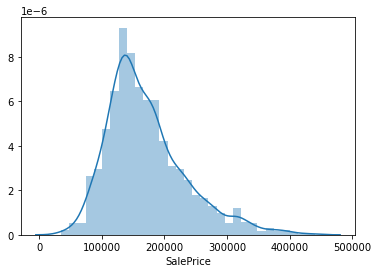

In [47]:
# checking the distribution of target variable, to make sure it is normally distributed.
sns.distplot(df.SalePrice)
plt.show()

It's still positively skewed, hence applying polynomial transformation (sqare root) transformation to remove skewness. Note: Log transformation isn't not working for the given dataset.

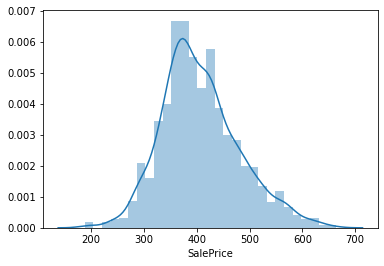

In [48]:
# Checking whether skewness issue is resolved.
sns.distplot(np.sqrt(df.SalePrice))
plt.show()

# Replacing 'SalePrice' with transformed values
df.SalePrice = np.sqrt(df.SalePrice)

## Train-Test Splitting

In [49]:
# Splitting the data to Train and Test sets
train,test = train_test_split(df, test_size=0.2, random_state= 100)

In [50]:
print(train.shape)
train.head()

(1072, 161)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not Present,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not Present,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not Present,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Present,GarageFinish_Not Present,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
131,60,69.0,12224.0,6,5,40.0,695.0,297.0,992.0,1022.0,1032.0,2054.0,1,2,1,3,1,2000,390.0,24.0,48.0,7,2009,493.963561,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
638,30,67.0,8777.0,5,7,0.0,0.0,796.0,796.0,796.0,0.0,796.0,0,1,0,2,0,0,0.0,328.0,0.0,5,2008,291.547595,58,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1233,20,69.0,12160.0,5,5,180.0,1000.0,188.0,1188.0,1188.0,0.0,1188.0,1,1,0,3,0,1959,531.0,0.0,0.0,5,2010,376.828874,51,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
214,60,69.0,10900.0,6,7,153.0,378.0,311.0,689.0,689.0,703.0,1392.0,0,1,1,3,0,1977,299.0,0.0,36.0,3,2010,402.181551,33,0,0,1,0,0,0,0,0,1,0,0

In [51]:
print(test.shape)
test.head()

(269, 161)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not Present,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not Present,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not Present,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Present,GarageFinish_Not Present,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,20,69.0,12968.0,5,6,0.0,737.0,175.0,912.0,912.0,0.0,912.0,1,1,0,2,0,1962,352.0,140.0,0.0,9,2008,379.473319,46,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
333,120,59.0,8198.0,7,5,146.0,720.0,638.0,1358.0,1358.0,0.0,1358.0,1,2,0,2,1,2004,484.0,192.0,30.0,7,2008,454.972527,4,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
346,20,69.0,12772.0,6,8,0.0,498.0,460.0,958.0,958.0,0.0,958.0,0,1,0,2,0,1960,301.0,0.0,0.0,4,2007,389.230009,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
891,60,70.0,11184.0,6,5,92.0,226.0,192.0,918.0,918.0,765.0,1683.0,0,2,1,3,1,1978,440.0,243.0,0.0,7,2009,415.331193,31,0,0,1,0,0,0,1,0,0,0,1,

In [52]:
#Scaling Numeric data using MinMax scalar as it will not affect dummy variables
scaler=MinMaxScaler()
num_vars= list(df.select_dtypes(exclude='object').columns)
train[num_vars] = scaler.fit_transform(train[num_vars])
test[num_vars] = scaler.transform(test[num_vars])
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not Present,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not Present,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not Present,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Present,GarageFinish_Not Present,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
131,0.235294,0.413793,0.319319,0.555556,0.50,0.059435,0.442112,0.167136,0.464419,0.367325,0.741379,0.625910,0.333333,0.666667,0.5,0.500000,0.333333,0.995025,0.391960,0.048,0.168421,0.545455,0.75,0.643759,0.150000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
638,0.058824,0.396552,0.216900,0.444444,0.75,0.000000,0.000000,0.447946,0.372659,0.246663,0.000000,0.168122,0.000000,0.333333,0.0,0.333333,0.000000,0.000000,0.000000,0.656,0.000000,0.363636,0.50,0.217990,0.966667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0

In [53]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not Present,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not Present,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Not Present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Not Present,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Not Present,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Not Present,GarageFinish_Not Present,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Not Present,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,0.000000,0.413793,0.341425,0.444444,0.625,0.000000,0.468830,0.098481,0.426966,0.308596,0.000000,0.210335,0.333333,0.333333,0.0,0.333333,0.000000,0.976119,0.353769,0.280,0.000000,0.727273,0.50,0.402936,0.766667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
333,0.588235,0.327586,0.199697,0.666667,0.500,0.216939,0.458015,0.359032,0.635768,0.546716,0.000000,0.372635,0.333333,0.666667,0.0,0.333333,0.333333,0.997015,0.486432,0.384,0.105263,0.545455,0.50,0.561744,0.066667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [ ]:
#Assigning all independent attributes as X and the Target Variable 'SalePrice' as Y
y_train = train.pop('SalePrice')
X_train = train
y_test = test.pop('SalePrice')
X_test = test

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
y_train.head()

## Recursive Feature Elimination

Since there are 161 features, it is impractical to do manual elimination using p-values and VIF method. Hence, using RFE to find the 50 most influencing features.

In [3]:
# Fitting the linear regression on train dataset
lm = LinearRegression()
lm.fit(X_train, y_train)
#Selecting features using RFE
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Selecting the influencing independent variables from the rfe ranking list
select = X_train.columns[rfe.support_]
len(list(select))
select

In [ ]:
# Assigning the selected varaibles to the x data to build the actual model
x_train_rfe = X_train[select]
# adding the constant
x_train_rfe = sm.add_constant(x_train_rfe)
#Fitting the data using Linear Regression to build model
lr = sm.OLS(y_train,x_train_rfe).fit()   

In [ ]:
x_test_rfe = X_test[select]
x_test_rfe = sm.add_constant(x_test_rfe)
x_test_rfe.head()

### Performance evaluation of the RFE model

In [4]:
# R2 score and RMSE
y_pred_train = lr.predict(x_train_rfe)
y_pred_test = lr.predict(x_test_rfe)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score on the train set: ', r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score on the test set: ', r2_test_lr)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
rmse_train_lr = mse_train_lr**0.5
print('Root Mean Squared Error on Train set: ',rmse_train_lr )
mse_test_lr = mean_squared_error(y_test, y_pred_test)
rmse_test_lr = mse_test_lr**0.5
print('Root Mean Squared Error on Test set: ', rmse_test_lr)

NameError: name 'lr' is not defined

The error is extremly high on test set and R2 value of test set is too low, which a clear case of overfitting. Thus we need to apply Regularization using Ridge and Lasso to get better results

## Ridge Regression

In [5]:
# Assigning possible values for hyperparameter alpha to parameter
parameter = {'alpha': [3.0,5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}

ridge = Ridge()

# cross validation
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train_rfe, y_train)

NameError: name 'x_train_rfe' is not defined

In [ ]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha'] <= 1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

In [ ]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

Thus optimum value for alpha is 1.0, using this value and building the model again using Ridge.

In [6]:
ridge_opt = Ridge(alpha= 3.0)
ridge_opt.fit(x_train_rfe, y_train)
ridge_opt.coef_

NameError: name 'x_train_rfe' is not defined

In [ ]:
# R2 score and RMSE
y_pred_train = ridge_opt.predict(x_train_rfe)
y_pred_test = ridge_opt.predict(x_test_rfe)

r2_train_r = r2_score(y_train, y_pred_train)
print('R2 Score on the train set: ', r2_train_r)
r2_test_r = r2_score(y_test, y_pred_test)
print('R2 Score on the test set: ', r2_test_r)
mse_train_r = mean_squared_error(y_train, y_pred_train)
rmse_train_r = mse_train_r**0.5
print('Root Mean Squared Error on Train set: ', rmse_train_r)
mse_test_r = mean_squared_error(y_test, y_pred_test)
rmse_test_r = mse_test_r**0.5
print('Root Mean Squared Error on Test set: ', rmse_test_r)

There is an increase in the R2 score on test dataset after using Ridge regression. However, we need to find the 10 most important predictor parameters, thus implementing RFE to identify them.

In [7]:
#Selecting features using RFE
rfe_r = RFE(ridge_opt)
rfe_r = rfe_r.fit(X_train, y_train)
rfe_rk = pd.DataFrame(list(zip(X_train.columns,ridge_opt.coef_.round(4),rfe.support_,rfe.ranking_)), columns=['Variable','Coefficient' ,'rfe_support', 'rfe_ranking'])
rfe_rk = rfe_rk.loc[rfe_rk['rfe_support'] == True]
rfe_rk['AbsCoefficient'] = rfe_rk['Coefficient'].abs()
rfe_rk = rfe_rk.sort_values('AbsCoefficient', ascending = False)
rfe_rk.reset_index(drop=True, inplace=True)
rfe_rk 

NameError: name 'X_train' is not defined

So the top 10 predictors for SalePrice, using ridge model are 

In [8]:
rfe_rk = rfe_rk.head(10)
rfe_rk['Variable']

NameError: name 'rfe_rk' is not defined

In [ ]:
# Plotting the effect of each of the top 10 features on SalePrice
sns.barplot(y = 'Variable', x= 'AbsCoefficient', data = rfe_rk)
plt.xlabel('Proportion of Effect on Sale Price')
plt.ylabel('Predictor Variable')
plt.show()

## Lasso Regression

In [ ]:
lasso = Lasso()
parameter = {'alpha': list(np.linspace(0.00019,0.001,100))}

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train_rfe, y_train) 

In [9]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

NameError: name 'lasso_model_cv' is not defined

In [ ]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)
print(lasso_model_cv.best_estimator_)

The optimal value for alpha in Lasso is 0.00019. Inputting that and building the new optimized Lasso Model.

In [10]:
lasso_opt = lasso_model_cv.best_estimator_
lasso_opt.fit(x_train_rfe, y_train)
# R2 score and RMSE
y_pred_train = lasso_opt.predict(x_train_rfe)
y_pred_test = lasso_opt.predict(x_test_rfe)

r2_train_l = r2_score(y_train, y_pred_train)
print('R2 Score on the train set: ', r2_train_l)
r2_test_l = r2_score(y_test, y_pred_test)
print('R2 Score on the test set: ', r2_test_l)
mse_train_l = mean_squared_error(y_train, y_pred_train)
rmse_train_l = mse_train_l**0.5
print('Root Mean Squared Error on Train set: ', rmse_train_l)
mse_test_l = mean_squared_error(y_test, y_pred_test)
rmse_test_l = mse_test_l**0.5
print('Root Mean Squared Error on Test set: ', rmse_test_l)

NameError: name 'lasso_model_cv' is not defined

There is even more increase in R2 Score, compared to Ridge model. However, we still need to select the top 10 predictor variables using RFE.

In [ ]:
#Selecting features using RFE
rfe_l = RFE(lasso_opt)
rfe_l = rfe_l.fit(X_train, y_train)
rfe_rkl = pd.DataFrame(list(zip(X_train.columns,lasso_opt.coef_.round(4),rfe_l.support_,rfe_l.ranking_)), columns=['Variable','Coefficient' ,'rfe_support', 'rfe_ranking'])
rfe_rkl = rfe_rkl.loc[rfe_rkl['rfe_support'] == True]
rfe_rkl['AbsCoefficient'] = rfe_rkl['Coefficient'].abs()
rfe_rkl = rfe_rkl.sort_values('AbsCoefficient', ascending = False)
rfe_rkl.reset_index(drop=True, inplace=True)
rfe_rkl

So the top 10 predictor variables while using Lasso model are

In [11]:
rfe_rkl = rfe_rkl.head(10)
rfe_rkl[['Variable', 'Coefficient']]

NameError: name 'rfe_rkl' is not defined

In [ ]:
rfe_rkl.to_excel('top10.xlsx')

In [ ]:
# Plotting the effect of each of the top 10 features on SalePrice
sns.barplot(y = 'Variable', x= 'AbsCoefficient', data = rfe_rkl)
plt.xlabel('Proportion of Effect on Sale Price')
plt.ylabel('Predictor Variable')
plt.show()

## Doubling the alpha for ridge and lasso

In [12]:
ridge_db = Ridge(alpha= 6.0)
ridge_db.fit(x_train_rfe, y_train)
# R2 score and RMSE
y_pred_train = ridge_db.predict(x_train_rfe)
y_pred_test = ridge_db.predict(x_test_rfe)

r2_train = r2_score(y_train, y_pred_train)
print('R2 Score on the train set: ', r2_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score on the test set: ', r2_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error on Train set: ', mse_train**0.5)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error on Test set: ', mse_test**0.5)

NameError: name 'x_train_rfe' is not defined

In [ ]:
# Checking the new top 10 predictor Variables
rfe_db = RFE(ridge_db)
rfe_db = rfe_db.fit(X_train, y_train)
rfe_rk = pd.DataFrame(list(zip(X_train.columns,ridge_db.coef_.round(4),rfe_db.support_,rfe_db.ranking_)), columns=['Variable','Coefficient' ,'rfe_support', 'rfe_ranking'])
rfe_rk = rfe_rk.loc[rfe_rk['rfe_support'] == True]
rfe_rk['AbsCoefficient'] = rfe_rk['Coefficient'].abs()
rfe_rk = rfe_rk.sort_values('AbsCoefficient', ascending = False)
rfe_rk.reset_index(drop=True, inplace=True)
rfe_rk_d = rfe_rk.head(10)
rfe_rk_d['Variable']

In [ ]:
# Plotting the effect of each of the top 10 features on SalePrice
sns.barplot(y = 'Variable', x= 'AbsCoefficient', data = rfe_rk_d)
plt.xlabel('Proportion of Effect on Sale Price')
plt.ylabel('Predictor Variable')
plt.show()

In [ ]:
lasso_db = Lasso(alpha= 0.00038)
lasso_db.fit(x_train_rfe, y_train)
# R2 score and RMSE
y_pred_train = lasso_db.predict(x_train_rfe)
y_pred_test = lasso_db.predict(x_test_rfe)

r2_train = r2_score(y_train, y_pred_train)
print('R2 Score on the train set: ', r2_train)
r2_test = r2_score(y_test, y_pred_test)
print('R2 Score on the test set: ', r2_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error on Train set: ', mse_train**0.5)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error on Test set: ', mse_test**0.5)

In [13]:
# Checking the new top 10 predictor Variables
rfe_ld = RFE(lasso_db)
rfe_ld = rfe.fit(X_train, y_train)
rfe_rkl = pd.DataFrame(list(zip(X_train.columns,lasso_db.coef_.round(4),rfe_ld.support_,rfe_ld.ranking_)), columns=['Variable','Coefficient' ,'rfe_support', 'rfe_ranking'])
rfe_rkl = rfe_rkl.loc[rfe_rkl['rfe_support'] == True]
rfe_rkl['AbsCoefficient'] = rfe_rkl['Coefficient'].abs()
rfe_rkl = rfe_rkl.sort_values('AbsCoefficient', ascending = False)
rfe_rkl.reset_index(drop=True, inplace=True)
rfe_rkl_d = rfe_rkl.head(10)
rfe_rkl_d['Variable']

NameError: name 'lasso_db' is not defined

In [ ]:
# Plotting the effect of each of the top 10 features on SalePrice
sns.barplot(y = 'Variable', x= 'AbsCoefficient', data = rfe_rk_d)
plt.xlabel('Proportion of Effect on Sale Price')
plt.ylabel('Predictor Variable')
plt.show()

In [ ]:
## Creating Model excluding 5 most important variables in Lasso
to_drop = list(rfe_rkl['Variable'].head(5))
X = x_train_rfe.drop(columns = to_drop)
lasso_n = Lasso(alpha= 0.00019)
lasso_n.fit(X, y_train)
rfe_n = RFE(lasso_n)
rfe_n = rfe_n.fit(X, y_train)
rfe_n = pd.DataFrame(list(zip(X.columns,lasso_db.coef_.round(4),rfe_n.support_,rfe_n.ranking_)), columns=['Variable','Coefficient' ,'rfe_support', 'rfe_ranking'])
rfe_n = rfe_n.loc[rfe_n['rfe_support'] == True]
rfe_n['AbsCoefficient'] = rfe_n['Coefficient'].abs()
rfe_n = rfe_n.sort_values('AbsCoefficient', ascending = False)
rfe_n.reset_index(drop=True, inplace=True)
rfe_n = rfe_n.head(5)
rfe_n['Variable']

In [ ]:
rfe_n[['Variable', 'Coefficient']].to_excel('top5.xlsx')

In [ ]:
Performance = [['Model', 'R2 Score (Train) in %', 'RMSE (Train)', 'R2 Score (Test) in %', 'RMSE (Test)'], ['Linear Regression + RFE', r2_train_lr*100, rmse_train_lr, r2_test_lr*100, rmse_test_lr], ['Ridge Regression', r2_train_r*100, rmse_train_r, r2_test_r*100, rmse_test_r], ['Lasso Regression', r2_train_l*100, rmse_train_l, r2_test_l*100, rmse_test_l]]
print(tabulate(Performance, headers = 'firstrow', tablefmt = 'fancy_grid'))

As <b>Lasso Regression</b> is performing the best on the test data, that would be the <b> best model </b>, and Features that influence the Sale Price of a house most are:

|Priority||Variable||Coefficient||Description|
|--------||--------||-----------||-----------|
|1||OverallQual||0.2417||The Overall Quality of Materials inside house and finish of Construction|
|2|	|BsmtFinSF1|	|0.1707|	 |The size in square feet of the finished Basement (Type 1)|
|3|	|OverallCond|	|0.1091|	 |The overall condition of the house|
|4|	|2ndFlrSF|	|0.0902|	 |Size of the Second Floor in square feet|
|5|	|MasVnrArea|	|-0.0684|	 |Size of the Mansory Veneer in square feet|
|6|	|Neighborhood_Crawfor|	|-0.0432|	 |If the house is located in the neighbrhood of Crawford|
|7|	|TotalBsmtSF|	|0.043|	|Total Basement Area in square feet|
|8|	|WoodDeckSF|	|0.0395|	 |Size of the Wood Deck in square feet|
|9|	|Fireplaces|	|0.0351|	|Number of Fireplaces|
|10|	|LotConfig_CulDSac|	|0.0348|	|If Lot Configeration is Cul-de-sac|

Out of these variables, 
- OverallQual, BsmtFinSF1, OverallCond, 2ndFlrSF, TotalBsmtSF, WoodDeckSF, Fireplaces, LotConfig_CulDSac are positively influencing the Sale Price. That's an increase in these variables will also cause an increase in Sale Price of the house.
- MasVnrArea, Neighborhood_Crawfor are  negatively influencing the Sale Price. That's a decrease in these variables will cause an increase in Sale Price of the house.